In [2]:
# %pip install pandas numpy matplotlib
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [3]:
# load the GTFS files
agency = pd.read_csv('../data/raw/Abidjan/agency.txt')
calendar = pd.read_csv('../data/raw/Abidjan/calendar.txt')
feed_info = pd.read_csv('../data/raw/Abidjan/feed_info.txt')
frequencies = pd.read_csv('../data/raw/Abidjan/frequencies.txt')
routes = pd.read_csv('../data/raw/Abidjan/routes.txt')
shapes = pd.read_csv('../data/raw/Abidjan/shapes.txt')
stop_times = pd.read_csv('../data/raw/Abidjan/stop_times.txt')
stops = pd.read_csv('../data/raw/Abidjan/stops.txt')
trips = pd.read_csv('../data/raw/Abidjan/trips.txt')

In [4]:
stops.head()

,stop_lat,stop_name,stop_lon,location_type,parent_station,stop_id
0,5.316444,Niangon Sud à Gauche,-4.089334,0,NaN,node/768587345
1,5.319878,Yopougon Sideci,-4.080402,0,NaN,node/768587373
2,5.315865,Gare lagunaire Aqualines du Plateau,-4.014885,0,NaN,node/1227889258
3,5.360835,Agban,-4.017123,0,NaN,node/2381298633
4,5.343897,Fraternité Matin,-4.018311,0,NaN,node/2444131222


In [5]:
agency.head()

,agency_lang,agency_name,agency_id,agency_timezone,agency_url
0,fr,Divers opérateurs,divers,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
1,NaN,monbus,monbus,Africa/Abidjan,http://www.sotra.ci
2,NaN,Gbaka d'Adjamé,Gbaka d'Adjamé,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
3,NaN,Gbaka d'Abobo,Gbaka d'Abobo,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
4,NaN,monbus / Navette,monbus / Navette,Africa/Abidjan,http://www.sotra.ci


In [6]:
print("Number of unique agencies: ", agency['agency_id'].nunique())

Number of unique agencies:  23


In [7]:
agency.shape

(23, 5)

In [8]:
print("Number of unique routes: ", routes['route_id'].nunique())
print("Number of unique stops: ", stops['stop_id'].nunique())
print("Number of unique trips: ", trips['trip_id'].nunique())

Number of unique routes:  325
Number of unique stops:  3339
Number of unique trips:  680


In [9]:
print("Trip statistics:\n ")
print(stop_times.groupby('trip_id')['stop_sequence'].max().describe())

Trip statistics:
 
count    680.000000
mean      12.942647
std        9.662551
min        2.000000
25%        5.000000
50%       10.000000
75%       20.000000
max       41.000000
Name: stop_sequence, dtype: float64


In [10]:
agency.describe()

,agency_lang,agency_name,agency_id,agency_timezone,agency_url
count,1,23,23,23,23
unique,1,23,23,1,4
top,fr,Divers opérateurs,divers,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
freq,1,1,1,23,16


In [11]:
agency.isnull().sum()

agency_lang        22
agency_name         0
agency_id           0
agency_timezone     0
agency_url          0
dtype: int64

In [12]:
agency.drop(columns=['agency_lang'], inplace=True)

In [13]:
agency.drop_duplicates(inplace=True)

In [14]:
agency.sample(10)

,agency_name,agency_id,agency_timezone,agency_url
0,Divers opérateurs,divers,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
1,monbus,monbus,Africa/Abidjan,http://www.sotra.ci
11,Woro-woro de Cocody,Woro-woro de Cocody,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
13,Woro-woro de Yopougon,Woro-woro de Yopougon,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
4,monbus / Navette,monbus / Navette,Africa/Abidjan,http://www.sotra.ci
15,Aqualines,Aqualines,Africa/Abidjan,https://www.facebook.com/aqualinesbycitrans/
22,Gbaka de Port-Bouët,Gbaka de Port-Bouët,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
21,Woro-woro d'Attecoubé,Woro-woro d'Attecoubé,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
12,Woro-woro de Treichville,Woro-woro de Treichville,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...
9,Gbaka de Yopougon,Gbaka de Yopougon,Africa/Abidjan,https://wiki.openstreetmap.org/wiki/FR:WikiPro...


In [15]:
calendar.head()

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,Mo-Su,20200101,20201231,1,1,1,1,1,1,1


In [16]:
feed_info.head()

,feed_start_date,feed_end_date,feed_publisher_url,feed_version,feed_publisher_name,feed_lang
0,20200101,20201231,http://junglebus.io,0.1,Jungle Bus,fr


In [17]:
frequencies.head()

,trip_id,start_time,end_time,headway_secs,exact_times
0,0,05:00:00,07:00:00,3600,0
1,0,07:00:00,09:00:00,2400,0
2,0,09:00:00,17:00:00,2880,0
3,0,17:00:00,20:00:00,2160,0
4,1,05:00:00,07:00:00,3600,0


In [18]:
frequencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   trip_id       1082 non-null   int64 
 1   start_time    1082 non-null   object
 2   end_time      1082 non-null   object
 3   headway_secs  1082 non-null   int64 
 4   exact_times   1082 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.4+ KB


In [19]:
frequencies.shape

(1082, 5)

In [20]:
routes.head()

,route_long_name,route_short_name,route_type,agency_id,route_id,route_desc,route_color,route_text_color
0,Gare Sud ↔ Liberté Adjamé,91.0,3,monbus,10087961,NaN,1779c2,ffffff
1,Gare Sud ↔ Yopougon Camp Militaire,37.0,3,monbus,10173635,NaN,1779c2,ffffff
2,gbaka : Adjamé Liberté ↔ Treichville Gare de B...,NaN,3,Gbaka d'Adjamé,10179006,NaN,1779c2,ffffff
3,gbaka : Adjamé ↔ Abobo Gare Mairie,NaN,3,Gbaka d'Abobo,10179435,NaN,1779c2,ffffff
4,gbaka : Adjamé Liberté ↔ Abobo Gare Mairie,NaN,3,Gbaka d'Abobo,10184139,NaN,1779c2,ffffff


In [21]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   route_long_name   325 non-null    object 
 1   route_short_name  117 non-null    float64
 2   route_type        325 non-null    int64  
 3   agency_id         325 non-null    object 
 4   route_id          325 non-null    int64  
 5   route_desc        0 non-null      float64
 6   route_color       325 non-null    object 
 7   route_text_color  325 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 20.4+ KB


In [22]:
routes.shape

(325, 8)

In [23]:
routes.drop(columns=['route_desc'], inplace=True)

In [24]:
routes.drop_duplicates(inplace=True)

In [25]:
routes.shape

(325, 7)

In [26]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,10213485,5.353437,-4.015795,1,NaN
1,10213485,5.353441,-4.016056,2,NaN
2,10213485,5.353441,-4.016073,3,NaN
3,10213485,5.353479,-4.016244,4,NaN
4,10213485,5.353549,-4.016583,5,NaN


In [27]:
shapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152359 entries, 0 to 152358
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   shape_id             152359 non-null  int64  
 1   shape_pt_lat         152359 non-null  float64
 2   shape_pt_lon         152359 non-null  float64
 3   shape_pt_sequence    152359 non-null  int64  
 4   shape_dist_traveled  0 non-null       float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [28]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on the Earth's surface using the Haversine formula.
    """
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c  # Earth's radius in kilometers

    return distance

# Calculate distances and accumulate them
shapes['shape_dist_traveled'] = 0.0

for shape_id in shapes['shape_id'].unique():
    shape_points = shapes[shapes['shape_id'] == shape_id].sort_values(by='shape_pt_sequence')
    distances = [0.0]
    for i in range(1, len(shape_points)):
        lat1, lon1 = shape_points.iloc[i - 1][['shape_pt_lat', 'shape_pt_lon']]
        lat2, lon2 = shape_points.iloc[i][['shape_pt_lat', 'shape_pt_lon']]
        distance = haversine(lat1, lon1, lat2, lon2)
        distances.append(distance)
    shapes.loc[shapes['shape_id'] == shape_id, 'shape_dist_traveled'] = np.cumsum(distances)

shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,10213485,5.353437,-4.015795,1,0.000000
1,10213485,5.353441,-4.016056,2,0.028865
2,10213485,5.353441,-4.016073,3,0.030725
3,10213485,5.353479,-4.016244,4,0.050125
4,10213485,5.353549,-4.016583,5,0.088473


In [29]:
shapes.head(20)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,10213485,5.353437,-4.015795,1,0.000000
1,10213485,5.353441,-4.016056,2,0.028865
2,10213485,5.353441,-4.016073,3,0.030725
3,10213485,5.353479,-4.016244,4,0.050125
4,10213485,5.353549,-4.016583,5,0.088473
5,10213485,5.353580,-4.016819,6,0.114813
6,10213485,5.353591,-4.016888,7,0.122560
7,10213485,5.353569,-4.017004,8,0.135655
8,10213485,5.353524,-4.017075,9,0.144991
9,10213485,5.353459,-4.017129,10,0.154314


In [30]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,06:00:00,06:00:00,node/6907157794,1,NaN,NaN,NaN,NaN,NaN
1,0,06:02:06,06:02:06,node/6908914491,2,NaN,NaN,NaN,NaN,NaN
2,0,06:06:14,06:06:14,node/2444131222,3,NaN,NaN,NaN,NaN,NaN
3,0,06:11:04,06:11:04,node/6913974340,4,NaN,NaN,NaN,NaN,NaN
4,0,06:14:21,06:14:21,node/6195348341,5,NaN,NaN,NaN,NaN,NaN


In [31]:
stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              8801 non-null   int64  
 1   arrival_time         8801 non-null   object 
 2   departure_time       8801 non-null   object 
 3   stop_id              8801 non-null   object 
 4   stop_sequence        8801 non-null   int64  
 5   stop_headsign        0 non-null      float64
 6   pickup_type          0 non-null      float64
 7   drop_off_type        0 non-null      float64
 8   shape_dist_traveled  0 non-null      float64
 9   timepoint            0 non-null      float64
dtypes: float64(5), int64(2), object(3)
memory usage: 687.7+ KB


In [32]:
stops.head()

,stop_lat,stop_name,stop_lon,location_type,parent_station,stop_id
0,5.316444,Niangon Sud à Gauche,-4.089334,0,NaN,node/768587345
1,5.319878,Yopougon Sideci,-4.080402,0,NaN,node/768587373
2,5.315865,Gare lagunaire Aqualines du Plateau,-4.014885,0,NaN,node/1227889258
3,5.360835,Agban,-4.017123,0,NaN,node/2381298633
4,5.343897,Fraternité Matin,-4.018311,0,NaN,node/2444131222


In [33]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_lat        3339 non-null   float64
 1   stop_name       3339 non-null   object 
 2   stop_lon        3339 non-null   float64
 3   location_type   3339 non-null   int64  
 4   parent_station  0 non-null      float64
 5   stop_id         3339 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 156.6+ KB


In [34]:
trips.head()

,trip_id,service_id,route_id,shape_id,direction_id,trip_headsign
0,0,Mo-Su,10087961,10213485,0,Gare sud
1,1,Mo-Su,10087961,10087879,1,Liberté Adjamé
2,2,Mo-Su,10173635,10173634,0,Gare Sud
3,3,Mo-Su,10173635,10173633,1,Yopougon Camp Militaire
4,4,Mo-Su,10179006,10178669,0,Treichville Gare de Bassam


In [35]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   trip_id        680 non-null    int64 
 1   service_id     680 non-null    object
 2   route_id       680 non-null    int64 
 3   shape_id       680 non-null    int64 
 4   direction_id   680 non-null    int64 
 5   trip_headsign  680 non-null    object
dtypes: int64(4), object(2)
memory usage: 32.0+ KB


In [36]:
stop_name_map = stops.set_index('stop_id')['stop_name'].to_dict()

stop_times['stop_headsign'] = stop_times['stop_id'].map(stop_name_map)

In [37]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,06:00:00,06:00:00,node/6907157794,1,Adjamé Liberté,NaN,NaN,NaN,NaN
1,0,06:02:06,06:02:06,node/6908914491,2,Pharmacie le Belier,NaN,NaN,NaN,NaN
2,0,06:06:14,06:06:14,node/2444131222,3,Fraternité Matin,NaN,NaN,NaN,NaN
3,0,06:11:04,06:11:04,node/6913974340,4,Gendarmerie,NaN,NaN,NaN,NaN
4,0,06:14:21,06:14:21,node/6195348341,5,Cathédrale Saint paul,NaN,NaN,NaN,NaN


In [38]:
# import os
# import gtfs_kit as gk
# from gtfs_kit import feed


# class GTFSFeedMerger:
#     def __init__(self, gtfs_files):
#         self.gtfs_files = gtfs_files
#         self.feeds = self._read_feeds()

#     def _read_feeds(self):
#         """Read all GTFS feeds from the provided file paths"""
#         return [gk.read_feed(file, dist_units='km') for file in self.gtfs_files]
    
#     def _create_new_ids(self, feed_index, id_name, tables):
#         """Create unique IDs for the specifiec GTFS tables to avoid conflicts"""
#         def values(feed_index, table_name, id_name):
#             return self.feeds[feed_index].get_table(table_name)[id_name]
        
#         ids = pd.concat([values(feed_index, table, id_name) for table in tables], axis=0)
#         new_ids = [f"{feed_index}_{i}" for i in range(1, len(ids) + 1)]

#         for table in tables:
#             if table in self.feeds[feed_index].tables:
#                 self.feeds[feed_index].tables[table][id_name] = self.feeds[feed_index].tables[table][id_name].apply(lambda x: new_ids[ids.to_list().index(x)])

#     def _apply_id_changes(self):
#         """Apply unique ID generation across all relevant GTFS tables"""
#         for i in range(len(self.feeds)):
#             self._create_new_ids(i, 'shape_id', ['shapes', 'trips'])
#             self._create_new_ids(i, 'agency_id', ['agency', 'routes'])
#             self._create_new_ids(i, 'route_id', ['routes', 'trips'])
#             self._create_new_ids(i, 'trip_id', ['trips', 'stop_times', 'frequencies'])
#             self._create_new_ids(i, 'stop_id', ['stop_times', 'stops'])
#             self._create_new_ids(i, 'sesrvice_id', ['trips', 'calendar'])

#     def _merge_tables(self, table_name):
#         """Merge a specific table from all feeds into one"""
#         return pd.concat([self.feeds[i].get_table(table_name) for i in range(len(self.feeds))], ignore_index=True)
    
#     def merge_feeds(self):
#         """Merge all GTFS feeds into one consolidated feed"""
#         self._apply_id_changes()

#         merged_tables = {
#             'agency': self._merge_table('agency'),
#             'routes': self._merge_table('routes'),
#             'stops': self._merge_table('stops'),
#             'stop_times': self._merge_table('stop_times'),
#             'shapes': self._merge_table('shapes'),
#             'trips': self._merge_table('trips'),
#             'calendar': self._merge_table('calendar'),
#             'frequencies': self._merge_table('frequencies')
#         }

#         # Create a new GTFS feed object
#         return gk.Feed(merged_tables)
    
#     def save_merged_feed(self, output_path):
#         """Save the merged GTFS feed into a specified file path"""
#         merged_feed = self.merge_feeds()
#         gk.write_feed(merged_feed, output_path)


# if __name__ == "__main__":
#     # speficify the working directory to the specified path where the GTFS files are located
#     # os.chdir('')

#     gtfs_files = []
#     merger = GTFSFeedMerger(gtfs_files)

#     output_path = '' # some specific file
#     merger.save_merged_feed(output_path)

In [39]:
calendar['start_date'] = pd.to_datetime(calendar['start_date'], format='%Y%m%d')
calendar['end_date'] = pd.to_datetime(calendar['end_date'], format='%Y%m%d')

In [40]:
stop_times = pd.read_csv('../data/raw/Abidjan/stop_times.txt')

In [41]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,06:00:00,06:00:00,node/6907157794,1,NaN,NaN,NaN,NaN,NaN
1,0,06:02:06,06:02:06,node/6908914491,2,NaN,NaN,NaN,NaN,NaN
2,0,06:06:14,06:06:14,node/2444131222,3,NaN,NaN,NaN,NaN,NaN
3,0,06:11:04,06:11:04,node/6913974340,4,NaN,NaN,NaN,NaN,NaN
4,0,06:14:21,06:14:21,node/6195348341,5,NaN,NaN,NaN,NaN,NaN


Number of Routes: 325
Number of Stops: 3339
Number of Trips: 680
Average Stops per Route: route_id
5985016     30.5
9589447     28.5
10087961     9.0
10173635    26.0
10179006     5.5
            ... 
11703171     5.0
11703223     7.5
11703304     5.0
11758498    18.0
11758556    18.0
Name: stop_id, Length: 325, dtype: float64
Average Trips per Route: route_id
10270789    6
10216288    6
10289376    4
10229775    4
10232988    4
           ..
10394941    2
10391644    2
10361922    2
10301548    2
9589447     2
Name: count, Length: 325, dtype: int64


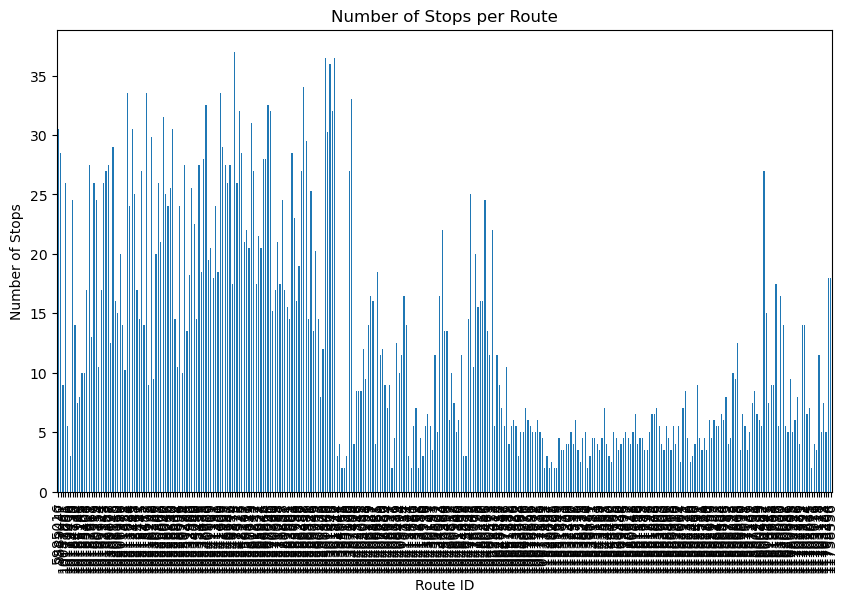

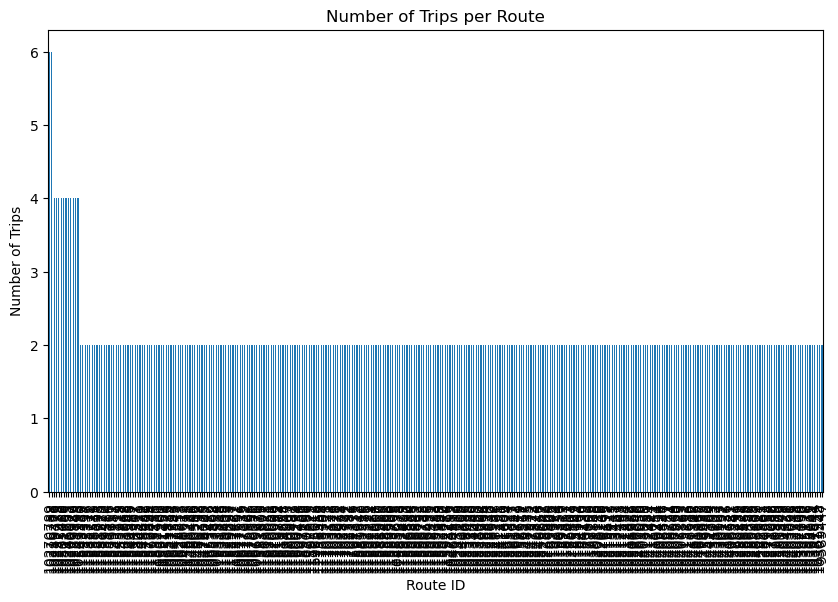

In [43]:
num_routes = routes['route_id'].nunique()
num_stops = stops['stop_id'].nunique()
num_trips = trips['trip_id'].nunique()

# Calculate stops per route
stops_per_route = stop_times.groupby('trip_id')['stop_id'].nunique().groupby(trips['route_id']).mean()


# Calculate trips per route
trips_per_route = trips['route_id'].value_counts()

# Display calculated statistics
print(f"Number of Routes: {num_routes}")
print(f"Number of Stops: {num_stops}")
print(f"Number of Trips: {num_trips}")
print(f"Average Stops per Route: {stops_per_route}")
print(f"Average Trips per Route: {trips_per_route}")

# Visualize the distribution of stops per route
plt.figure(figsize=(10, 6))
stops_per_route.plot(kind='bar')
plt.title('Number of Stops per Route')
plt.xlabel('Route ID')
plt.ylabel('Number of Stops')
plt.show()

# Visualize the distribution of trips per route
plt.figure(figsize=(10, 6))
trips_per_route.plot(kind='bar')
plt.title('Number of Trips per Route')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.show();

In [45]:
import folium
import random

# Create a base map centered on Abidjan
m = folium.Map(location=[5.3364, -4.0267], zoom_start=12)

# Function to generate a random color
def random_color():
    return '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))

# Create a dictionary to store stops for each route
route_stops = {}

# Populate the route_stops dictionary
for _, row in stop_times.iterrows():
    route_id = trips.loc[trips['trip_id'] == row['trip_id'], 'route_id'].iloc[0]
    if route_id not in route_stops:
        route_stops[route_id] = set()
    route_stops[route_id].add(row['stop_id'])

# Plot routes on the map
for route_id, stop_ids in route_stops.items():
    route_color = routes.loc[routes['route_id'] == route_id, 'route_color'].iloc[0] if 'route_color' in routes.columns else random_color()
    route_name = routes.loc[routes['route_id'] == route_id, 'route_long_name'].iloc[0] if 'route_long_name' in routes.columns else f"Route {route_id}"
    
    route_stops_data = stops[stops['stop_id'].isin(stop_ids)]
    
    # Create a PolyLine for the route
    folium.PolyLine(
        locations=route_stops_data[['stop_lat', 'stop_lon']].values,
        color=f"#{route_color}",
        weight=2,
        opacity=0.8,
        popup=route_name
    ).add_to(m)
    
    # Add stops to the map
    for _, stop in route_stops_data.iterrows():
        folium.CircleMarker(
            location=[stop['stop_lat'], stop['stop_lon']],
            radius=3,
            popup=stop['stop_name'],
            color='red',
            fill=True
        ).add_to(m)

m.save('abidjan_transit_network.html')

/var/folders/xs/d1td623j4l5_3s9p262jr4yw0000gn/T/ipykernel_9662/2280893911.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=stops, x='stop_lon', y='stop_lat', cmap='YlOrRd', shade=True)


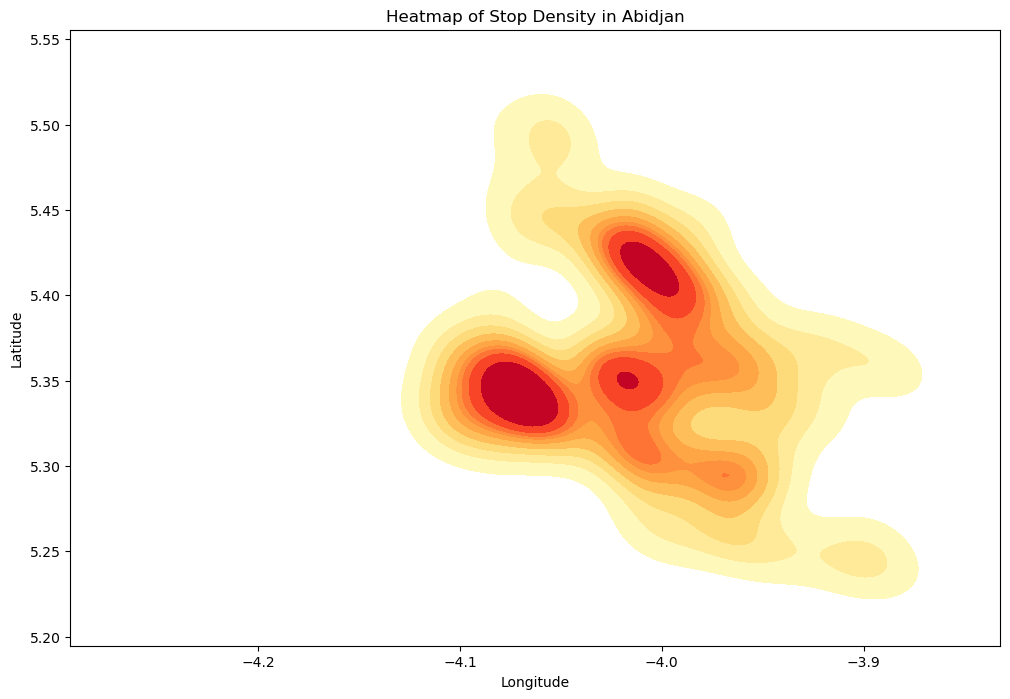

In [47]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.kdeplot(data=stops, x='stop_lon', y='stop_lat', cmap='YlOrRd', shade=True)
plt.title('Heatmap of Stop Density in Abidjan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [48]:
from folium.plugins import HeatMap

# Create a base map centered on Abidjan
m = folium.Map(location=[5.3364, -4.0267], zoom_start=12)

# Prepare the data for the heatmap
heat_data = stops[['stop_lat', 'stop_lon']].values.tolist()

# Add the heatmap layer
HeatMap(heat_data).add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)

# Save the map
m.save('abidjan_stop_density_heatmap.html')

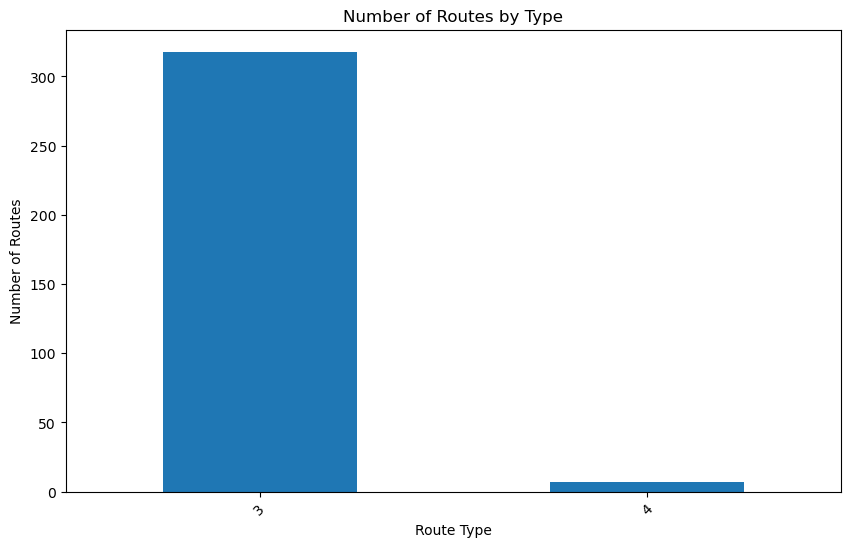

In [49]:
route_types = routes['route_type'].value_counts()
plt.figure(figsize=(10, 6))
route_types.plot(kind='bar')
plt.title('Number of Routes by Type')
plt.xlabel('Route Type')
plt.ylabel('Number of Routes')
plt.xticks(rotation=45)
plt.show()

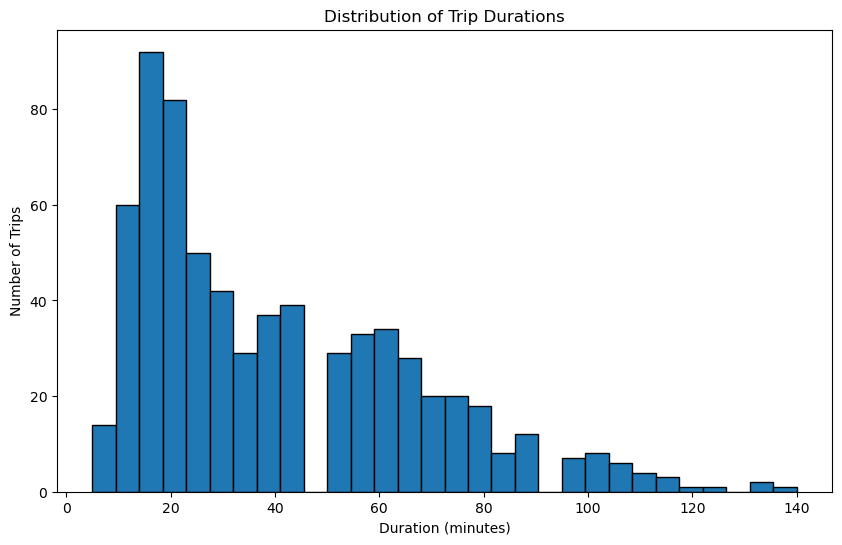

In [50]:
def calculate_trip_duration(trip_id):
    trip_stops = stop_times[stop_times['trip_id'] == trip_id].sort_values('stop_sequence')
    start_time = pd.to_datetime(trip_stops['departure_time'].iloc[0])
    end_time = pd.to_datetime(trip_stops['arrival_time'].iloc[-1])
    return (end_time - start_time).total_seconds() / 60

trips['duration'] = trips['trip_id'].apply(calculate_trip_duration)

plt.figure(figsize=(10, 6))
plt.hist(trips['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.show();

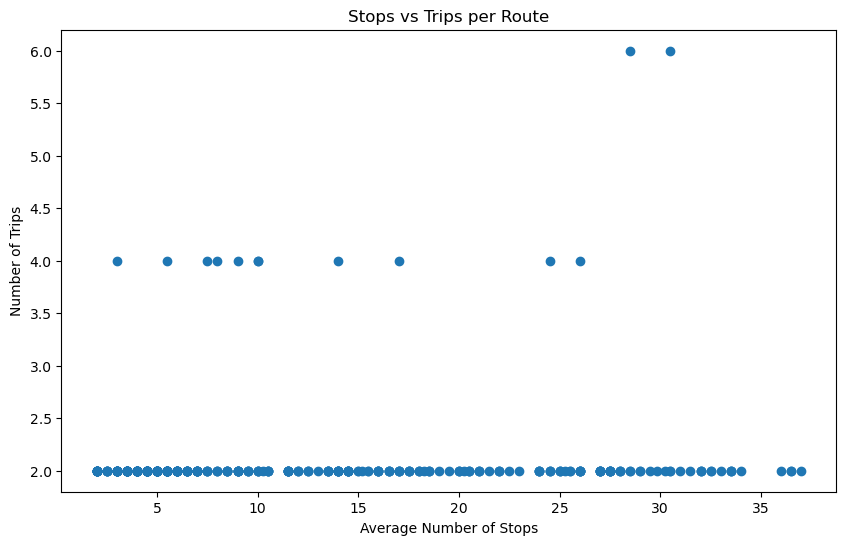

In [51]:
stops_per_route = stop_times.groupby('trip_id')['stop_id'].nunique().groupby(trips['route_id']).mean()
trips_per_route = trips['route_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(stops_per_route, trips_per_route)
plt.title('Stops vs Trips per Route')
plt.xlabel('Average Number of Stops')
plt.ylabel('Number of Trips')
plt.show();

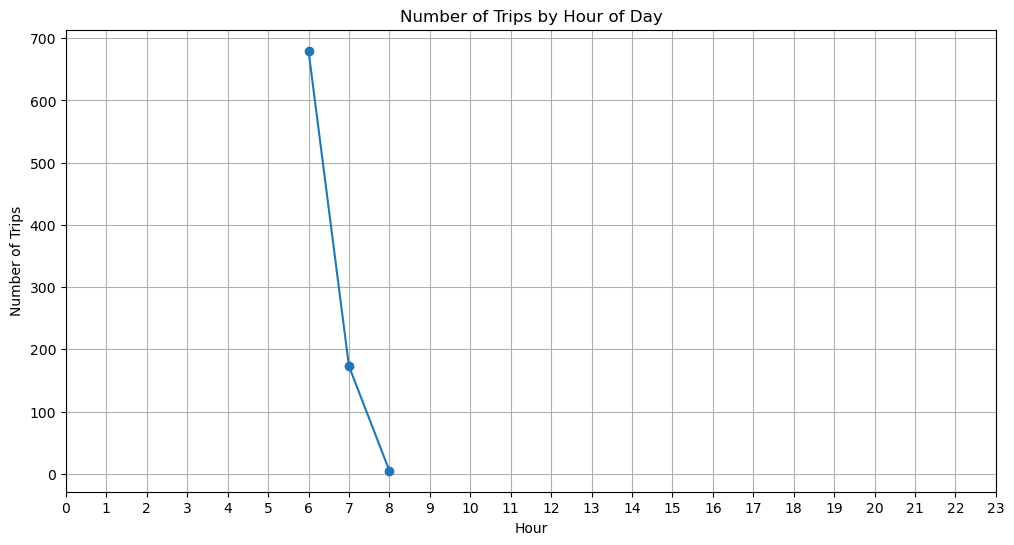

In [52]:
def extract_hour(time_str):
    return pd.to_datetime(time_str).hour

stop_times['hour'] = stop_times['departure_time'].apply(extract_hour)
hourly_trips = stop_times.groupby('hour')['trip_id'].nunique()

plt.figure(figsize=(12, 6))
hourly_trips.plot(kind='line', marker='o')
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show();

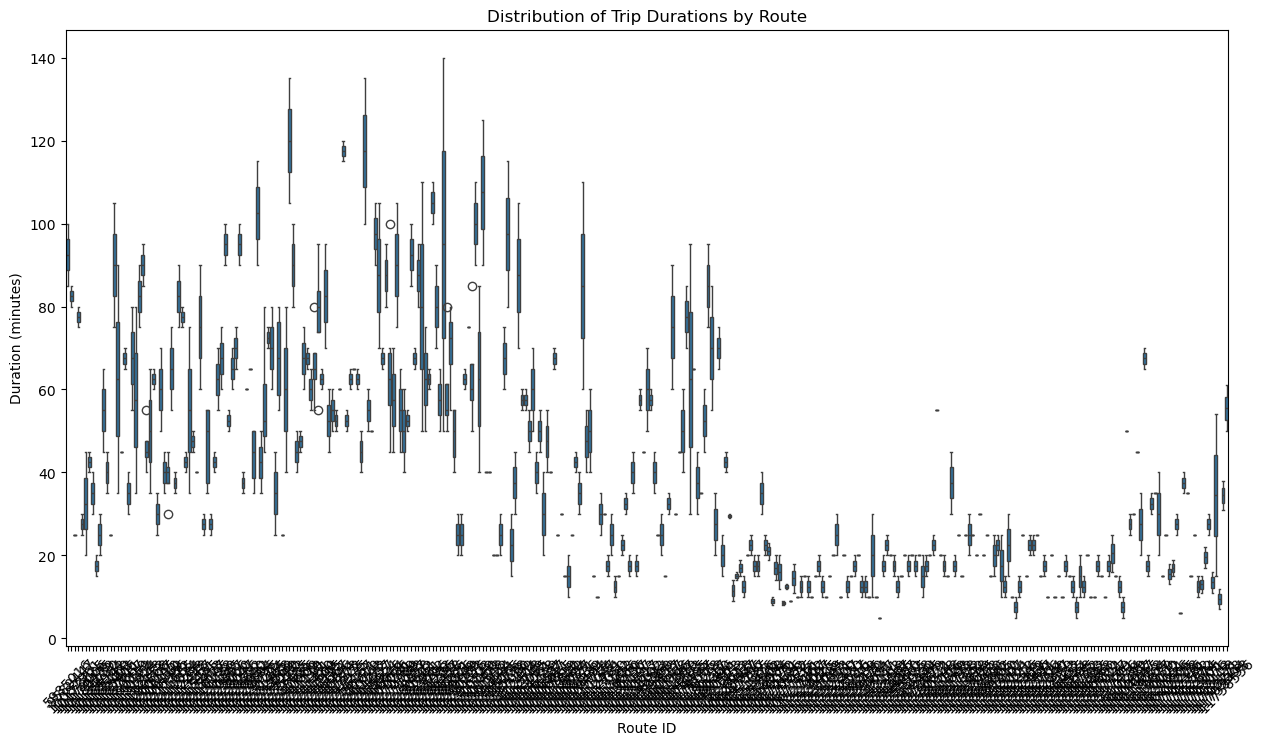

In [55]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='route_id', y='duration', data=trips)
plt.title('Distribution of Trip Durations by Route')
plt.xlabel('Route ID')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show();